In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

In [3]:
# Chrome 설정
# 크롬 브라우저 실행 시 사용할 환경 설정 옵션 객체를 생성
options = Options()

In [4]:
# 객체에 대한 실행 설정 추가
options.add_argument("--headless") # 브라우저 화면 없이 백그라운드에서 실행
options.add_argument("--no-sandbox") # 샌드박스 보안 기능 비활성화
options.add_argument("--disable-dev-shm-usage") # 공유 메모리 파일 시스템 사용 비활성화

In [5]:
# 백그라운드에서 크롬 브라우저 실행
driver = webdriver.Chrome(options=options)

# url 주소
url = "https://news.naver.com/"

# 백그라운드에서 페이지 열기
driver.get(url)

In [6]:
# 렌더링 대기를 하는 이유:
# 대부분의 웹 사이트는 JS로 콘텐츠를 동적으로 생성하기 때문에 
# url 주소의 페이지를 여는 순간 전체 HTML 코드가 완성되지 않음
time.sleep(2)

# 페이지 소스(html) 가져오기
html = driver.page_source

# HTML 파싱 = HTML 구조를 탐색하고 필요한 요소들을 추출하기 위한 작업
soup = BeautifulSoup(html, "html.parser")

In [13]:
# 추출 대상 탭
target_cats = ['정치', '경제', '생활/문화', 'IT/과학']

# 탭 링크 추출
tap_links = {}

for link in soup.select('ul.Nlnb_menu_list li a'):
  selected_cat = link.get_text(strip = True)
  if selected_cat in target_cats:
    tap_links[selected_cat] = link['href']

print(tap_links)

{'정치': 'https://news.naver.com/section/100', '경제': 'https://news.naver.com/section/101', '생활/문화': 'https://news.naver.com/section/103', 'IT/과학': 'https://news.naver.com/section/105'}


In [ ]:
# 각 카테고리별 링크에서 "헤드라인 이슈"를 추출
driver.get(tap_links['정치'])
time.sleep(2)

new_html = driver.page_source
new_soup = BeautifulSoup(new_html, "html.parser")


<html data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/136.0.0.0 Safari/537.36" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="정치 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/section/100" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221201.png" property="og:image"/>
<meta content="국회, 행정, 국방, 외교 등 정치 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="정치 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twit
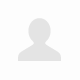
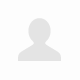

In [15]:
print(new_soup)

In [ ]:

# 렌더링 대기를 하는 이유:
# 대부분의 웹 사이트는 JS로 콘텐츠를 동적으로 생성하기 때문에 
# url 주소의 페이지를 여는 순간 전체 HTML 코드가 완성되지 않음
time.sleep(2)

# 페이지 소스(html) 가져오기
html = driver.page_source

# HTML 파싱 = HTML 구조를 탐색하고 필요한 요소들을 추출하기 위한 작업
soup = BeautifulSoup(html, "html.parser")

# 뉴스 컨텐츠가 있는 div 선택
target_div = soup.select_one("div.press_edit_news._nudge_wrap._CURATION_CARD")
print(target_div)

In [16]:
driver.quit()